In [2]:
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns

# Let's assume that we have a balanced design with 30 students in each group
n = 30
months = ['August', 'January', 'June']

# Generate random data
np.random.seed(1234)
control = np.random.normal(5.5, size=len(months) * n)
meditation = np.r_[np.random.normal(5.4, size=n),
                   np.random.normal(5.8, size=n),
                   np.random.normal(6.4, size=n)]

# Create a dataframe
df = pd.DataFrame({'Scores': np.r_[control, meditation],
                   'Time': np.r_[np.repeat(months, n), np.repeat(months, n)],
                   'Group': np.repeat(['Control', 'Meditation'], len(months) * n),
                   'Subject': np.r_[np.tile(np.arange(n), 3),
                                    np.tile(np.arange(n, n + n), 3)]})

In [3]:
# DESCRIPTIVE STATS
pg.print_table(df.head())


  Scores  Time    Group      Subject
--------  ------  -------  ---------
   5.971  August  Control          0
   4.309  August  Control          1
   6.933  August  Control          2
   5.187  August  Control          3
   4.779  August  Control          4



<AxesSubplot:xlabel='Time', ylabel='Scores'>

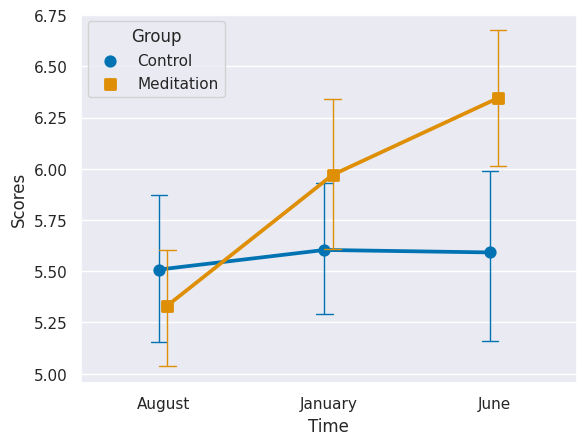

In [4]:
# import seaborn as sns
sns.set()
sns.pointplot(data=df, x='Time', y='Scores', hue='Group', dodge=True,
              markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')


In [5]:
print(df.groupby(['Time', 'Group']).agg(['mean', 'std']))

# ANOVA
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group',
                     subject='Subject', data=df)
pg.print_table(aov)

                      Scores           Subject          
                        mean       std    mean       std
Time    Group                                           
August  Control     5.508184  1.029795    14.5  8.803408
        Meditation  5.332482  0.813022    44.5  8.803408
January Control     5.603746  0.900437    14.5  8.803408
        Meditation  5.970728  1.074590    44.5  8.803408
June    Control     5.591624  1.179973    14.5  8.803408
        Meditation  6.345328  0.933034    44.5  8.803408

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        4.465      1     58  4.465  4.131    0.047  0.066  nan
Time         9.359      2    116  4.679  4.941    0.009  0.078    0.998
Interaction  6.539      2    116  3.270  3.452    0.035  0.056  nan



In [8]:
# POST-HOC TESTS
posthocs = pg.pairwise_ttests(dv='Scores', within='Time', between='Group',
                              subject='Subject', data=df)
pg.print_table(posthocs)



POST HOC TESTS

Contrast      Time     A        B           Paired    Parametric         T     dof  alternative      p-unc    BF10    hedges
------------  -------  -------  ----------  --------  ------------  ------  ------  -------------  -------  ------  --------
Time          -        August   January     True      True          -2.002  59.000  two-sided        0.050   0.908    -0.379
Time          -        August   June        True      True          -2.985  59.000  two-sided        0.004   7.594    -0.530
Time          -        January  June        True      True          -1.024  59.000  two-sided        0.310   0.232    -0.170
Group         -        Control  Meditation  False     True          -2.033  58.000  two-sided        0.047   1.447    -0.518
Time * Group  August   Control  Meditation  False     True           0.733  58.000  two-sided        0.466   0.329     0.187
Time * Group  January  Control  Meditation  False     True          -1.434  58.000  two-sided        0.157  